In [1]:
from simulai.models import Transformer
from simulai.regression import DenseNetwork
from simulai.utilities import view_api # view_api uses the package torchview
import torch 
import numpy as np


(process:15276): Pango-WARNING **: 16:30:14.382: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


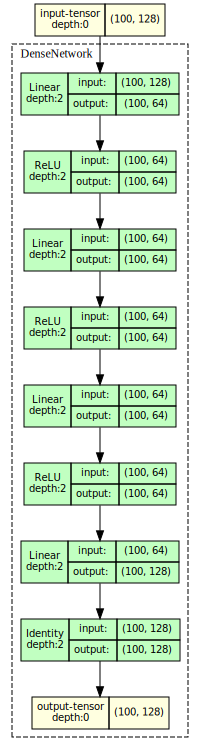

In [2]:
num_heads = 4
embed_dim = 128
hidden_dim = int(embed_dim//2)
number_of_encoders = 2
number_of_decoders = 2
output_size = embed_dim
n_samples = 100

input_data = torch.randn(n_samples, embed_dim)

config = {
    "layers_units": [hidden_dim, hidden_dim, hidden_dim],  # Hidden layers
    "activations": 'relu',
    "input_size": embed_dim,
    "output_size": embed_dim,
    "name": "mlp_layer",
}


net = DenseNetwork(**config)

view_api(module=net, input_data=input_data, config={"expand_nested":True, "depth":3})

In [21]:
# modified by @alesservin
# change _activation_getter that is creating an error in Transformers
def _custom_activation_getter(activation):
    if isinstance(activation, str):
        # Handle standard PyTorch activations
        if activation.lower() == 'relu':
            return torch.nn.ReLU()
        elif activation.lower() == 'sigmoid':
            return torch.nn.Sigmoid()
        # Add more standard activations as needed
        
        # If it's a custom activation, retrieve and ensure setup is called
        act = self._get_operation(operation=activation, is_activation=True)
        if hasattr(act, 'setup'):
            act.setup(device=self.device)
            print(self.device)
        return act
    else:
        raise ValueError(f"Unsupported activation type: {activation}")

Transformer._activation_getter = _custom_activation_getter

In [7]:
classOf(Transformer)

NameError: name 'classOf' is not defined

In [22]:
num_heads = 4
embed_dim = 128
hidden_dim = int(embed_dim//2)
number_of_encoders = 2
number_of_decoders = 2
output_size = embed_dim
n_samples = 100

input_data = torch.randn(n_samples, embed_dim)

config = {
    "layers_units": [hidden_dim, hidden_dim, hidden_dim],  # Hidden layers
    # "activations": 'wavelet',
    "activations": 'relu',
    "input_size": embed_dim,
    "output_size": embed_dim,
    "name": "mlp_layer",
}

transformer = Transformer(num_heads_encoder=num_heads,
                          num_heads_decoder=num_heads,
                          embed_dim_encoder=embed_dim,
                          embed_dim_decoder=embed_dim,
                          encoder_activation='relu',
                          decoder_activation='relu',
                          encoder_mlp_layer_config=config,
                          decoder_mlp_layer_config=config,
                          number_of_encoders=number_of_encoders,
                          number_of_decoders=number_of_decoders)

view_api(module=transformer, input_data=input_data, config={"expand_nested":True, "depth":3, "graph_dir": "TB"})

AttributeError: 'ReLU' object has no attribute 'setup'

In [12]:
def _activation_getter(activation):
    if isinstance(activation, str):
        # Handle standard PyTorch activations
        if activation.lower() == 'relu':
            return torch.nn.ReLU()
        elif activation.lower() == 'sigmoid':
            return torch.nn.Sigmoid()
        # Add more standard activations as needed
        
        # If it's a custom activation, retrieve and ensure setup is called
        act = self._get_operation(operation=activation, is_activation=True)
        if hasattr(act, 'setup'):
            act.setup(device=self.device)
            print(self.device)
        return act
    else:
        raise ValueError(f"Unsupported activation type: {activation}")

In [15]:
_activation_getter(activation="relu")

ReLU()